# Example Tree

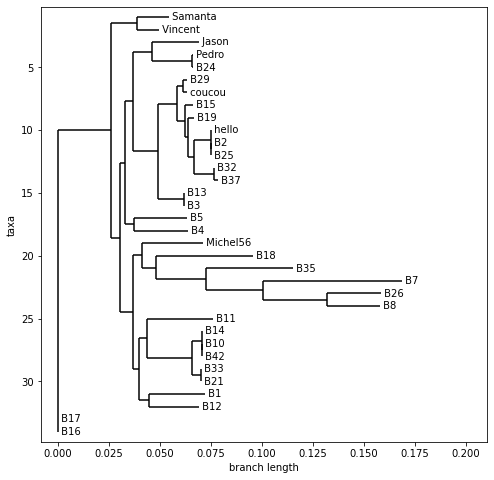

In [3]:
from Bio import Phylo
import matplotlib.pyplot as plt

t = Phylo.read('example.tree', 'newick')
plt.rcParams['figure.figsize'] = (8,8)
Phylo.draw(t)

In [4]:
!cat control.txt



OUTPUT= test  	    						# Output folder
TREE=  example.tree							# Tree file used for the simulations (nwk format)

# OPTIONS:

GC=45		  								# GC content (default = 50%)
LENGTH=50000								# Genome length (default = 10,000bp)
RESCALE= 0.9								# Tree rescaling coefficient (default = 1, no rescaling)
RHO=1        	 							# Recombination rate (default = 0, no recombination)
DELTA=  200									# Average recombination tract length (default = 100bp)
CODONS=0.2,0.1,0.7							# Mutation rate at codon positions (default = 0.33,0.33,0.33, uniform rates)
SUB_MODEL= K2P								# Substitution model: JC69, K2P, K3P or GTR (default= JC69, Jukes and Cantor)
KAPPA=1.1       							# Transition/transversion parameter for K2P model (default = 1). Can also be specified in SUB_RATE. 
#SEQUENCE= ref.fa							# Sequence file (fasta) with genome sequence to evolve (if provided, options GC and LENGTH become obsolete)
#SUB_RATE= 0.3,0.15,0.15,0.10,0.10,0.2		# Parameters of substitution model (JC69

In [5]:
!python coresimul_master.py control.txt

Launching pipeline with Python 3
Snake= 3
loc=   coresimul_master.py
Usage:  python coresimul_master.py   control.txt


### Welcome! ###

Output folder already exists. Previous files will be lost.
1. Reading the tree
['Samanta', 'Vincent', 'Jason', 'Pedro', 'B24', 'B29', 'coucou', 'B15', 'B19', 'hello', 'B2', 'B25', 'B32', 'B37', 'B13', 'B3', 'B5', 'B4', 'Michel56', 'B18', 'B35', 'B7', 'B26', 'B8', 'B11', 'B14', 'B10', 'B42', 'B33', 'B21', 'B1', 'B12', 'B17', 'B16']
Found  34 taxa in the tree
2. Extracting branch lengths and topology
3. Simulating

################
PARAMETERS: 
OUTPUT=  test/
Alignment Length=  50000 bp
GC%=  45.0 % (default=50%)
Branch rescaling=  0.9  (default=1, no rescaling)
Transition/Transversion bias, Kappa=  1.1  (default=1, no bias)
CODONS Frequency=  0.2,0.1,0.7 
STARTING GENOME=  none
SUBSTITUTION MODEL=  K2P with rate(s)  none
GAIN_RATE= none
LOSS_RATE= none
MIN_DELTA= 1
################

USAGE:
['simulation.py', 'no', '1', 'none', 'none', 'K2P', 'none', 'n

In [6]:
!ls test

core.fa     dichotomies.txt  genomes.fa  nu.txt        renamed.txt  roots.txt
detail.txt  genes	     names.txt	 renamed.tree  rm.txt


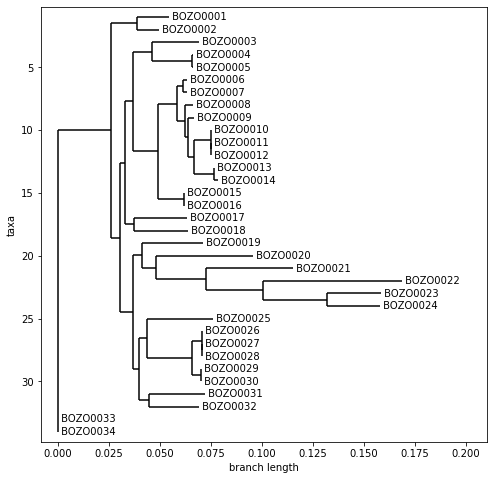

In [21]:
t = Phylo.read('test/renamed.tree', 'newick')
plt.rcParams['figure.figsize'] = (8,8)
Phylo.draw(t)

In [26]:
from Bio import AlignIO

align = AlignIO.read('test/core.fa', 'fasta')
print(align)

Alignment with 34 rows and 2028 columns
CGCGTGTTAACCTCCCAGAAGGTGGCACTTAACAGTCACCGCGT...GCT BOZO0033
CGCGTGTTAACCTCCCAGAAGGTGGCACTTAACAGTCACCGCGT...GCT BOZO0034
CGCGTGTTAACCTCCCAGAAGGTGGCACTCAACAGTCACCGCGT...GCA BOZO0017
CGCGTGTTAACCTCCCAGAAGGTGGCACTCAACAGTCACCGCGT...GCA BOZO0018
CGCGTGTTAACCTCCCAGAAGGTGGCACTTAACAGTCACCGCGT...GCA BOZO0001
CGCGTGTTAACCTCCCAGAAGGTGGCACTTAACAGTCACCGCGT...GCA BOZO0002
CGCGTGTTAACCTCCCAGAAGGTGGCACTCAACAGTCACCGCGT...GCA BOZO0019
CGCGTGTTGACCTCCCAGAAGGTGGCACTCAACAGGCACCGCGT...GCA BOZO0025
CGCGTGTTAACCTCCCAGAAGGTGGCACTCAACAGTCACCGCGT...GCA BOZO0031
CGCGTGTTAACGTCCCAGAAGGTGGCACTCAACAGCCACCGCGT...GCG BOZO0032
CGCGTGTTAACCTCCCAGAAGGTGGCACTCAACAGTCACCGCGT...GCC BOZO0003
CGCGTCTTAACCTCCCAGAAGGTGGCACTCAACAGTTACCGCGT...GCA BOZO0020
CGCGTCTTCACCTCCCAGAAGGTGGCACTCAACAGTCACCGCGT...GCA BOZO0006
CGCGTGTTAACCTCCCAGAAGGTGGCACTCAACAGTCACCGCGT...GCA BOZO0007
CGCGTGTTAACCTCCCAGAAGGTGGCACTCAACAGTCACCGCGT...GCA BOZO0015
CGCGTGTTAACCTCCCAGAAGGTGGCACTCAACAGTCACCGCGT...GCA BOZO0016


In [28]:
!iqtree -s test/core.fa

IQ-TREE multicore version 2.0.3 for Linux 64-bit built Dec 20 2020
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor,
Heiko Schmidt, Dominik Schrempf, Michael Woodhams.

Host:    PHAC5023362 (AVX512, FMA3, 12 GB RAM)
Command: iqtree -s test/core.fa
Seed:    170785 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Thu Jan 14 16:10:36 2021
Kernel:  AVX+FMA - 1 threads (8 CPU cores detected)

HINT: Use -nt option to specify number of threads because your CPU has 8 cores!
HINT: -nt AUTO will automatically determine the best number of threads to use.

Reading alignment file test/core.fa ... Fasta format detected
Alignment most likely contains DNA/RNA sequences
Alignment has 34 sequences with 2028 columns, 661 distinct patterns
559 parsimony-informative, 248 singleton sites, 1221 constant sites
          Gap/Ambiguity  Composition  p-value
   1  BOZO0033    0.00%    passed     72.76%
   2  BOZO0034    0.00%    passed     72.76%
   3  BOZO0017    0.00%    passed   

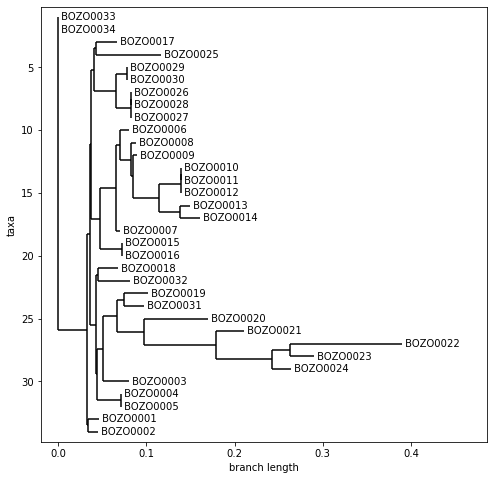

In [31]:
t = Phylo.read('test/core.fa.treefile', 'newick')
plt.rcParams['figure.figsize'] = (8,8)
Phylo.draw(t)